<a href="https://colab.research.google.com/github/Pranav4860/ES114-PSDV/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=sns.load_dataset(name='iris')

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
def meany(x):
  m=sum(x)/len(x)
  return m

In [ ]:
def vari(x):
  s=0
  for i in x:
    s+=((i-meany(x))**2)/(len(x)-1)
  return s

# Q1

Standardizing data

In [ ]:
def std(x):
  l=[0]*len(x)
  for i in range(len(x)):
    l[i]=(x[i]-meany(x))/(vari(x)**(1/2))
  return l

In [ ]:
sl=np.array(data['sepal_length'])
sw=np.array(data['sepal_width'])
pl=np.array(data['petal_length'])
pw=np.array(data['petal_width'])
d=[sl,sw,pl,pw]
stdl=[]
for i in d:
  t=std(i)
  stdl.append(t)
for i in stdl:
  print(i)
  print()

[-0.897673879196767, -1.139200483464954, -1.3807270877331421, -1.5014903898672367, -1.0184371813308606, -0.5353839727944844, -1.5014903898672367, -1.0184371813308606, -1.7430169941354239, -1.139200483464954, -0.5353839727944844, -1.2599637855990486, -1.2599637855990486, -1.8637802962695185, -0.052330764258109126, -0.17309406639220265, -0.5353839727944844, -0.897673879196767, -0.17309406639220265, -0.897673879196767, -0.5353839727944844, -0.897673879196767, -1.5014903898672367, -0.897673879196767, -1.2599637855990486, -1.0184371813308606, -1.0184371813308606, -0.7769105770626724, -0.7769105770626724, -1.3807270877331421, -1.2599637855990486, -0.5353839727944844, -0.7769105770626724, -0.41462067066039077, -1.139200483464954, -1.0184371813308606, -0.41462067066039077, -1.139200483464954, -1.7430169941354239, -0.897673879196767, -1.0184371813308606, -1.6222536920013304, -1.7430169941354239, -1.0184371813308606, -0.897673879196767, -1.2599637855990486, -0.897673879196767, -1.501490389867236

In [ ]:
def covari(x,y):
  mx=meany(x)
  my=meany(y)
  z=0
  for i in range(len(x)):
    z+=(x[i]-mx)*(y[i]-my)
  z/=(len(x)-1)
  return round(z,6)

Covariance Matrix

In [ ]:
cov_mat=[]
for i in stdl:
  mat=[]
  for j in stdl:
    co=covari(i,j)
    mat.append(co)
  cov_mat.append(mat)
for i in cov_mat:
  for j in i:
    print(j,end='\t')
  print()


1.0	-0.11757	0.871754	0.817941	
-0.11757	1.0	-0.42844	-0.366126	
0.871754	-0.42844	1.0	0.962865	
0.817941	-0.366126	0.962865	1.0	


# Q2

In [ ]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
eig_vals=list(eig_vals)
vals=np.copy(eig_vals)
vals.sort()
vals=vals[::-1]
rank=['First','Second','Third','Forth']
s_eig_vecs=[]
percentage=[]
s=sum(vals)
for i in vals:
  p=(i/s)*100
  st=str(p)+'%'
  percentage.append(st)
for i in range(len(vals)):
  print(rank[i],'Eigen Value:',vals[i])
  ind=eig_vals.index(vals[i])
  print(rank[i],'Principal Component',i+1,':',eig_vecs[ind])
  s_eig_vecs.append(eig_vecs[ind])
  print('Percentage of Variance Explained by Principal Component',i+1,':',percentage[i])
  print()
  print()

First Eigen Value: 2.918497643390025
First Principal Component 1 : [ 0.52106599 -0.3774175  -0.71956572  0.26128805]
Percentage of Variance Explained by Principal Component 1 : 72.96244108475068%


Second Eigen Value: 0.9140303137497128
Second Principal Component 2 : [-0.2693475  -0.9232957   0.24438138 -0.12350995]
Percentage of Variance Explained by Principal Component 2 : 22.850757843742834%


Third Eigen Value: 0.1467569294669362
Third Principal Component 3 : [ 0.58041308 -0.02449184  0.14212457 -0.80144957]
Percentage of Variance Explained by Principal Component 3 : 3.6689232366734075%


Forth Eigen Value: 0.020715113393323013
Forth Principal Component 4 : [ 0.56485646 -0.06694193  0.63427401  0.52359568]
Percentage of Variance Explained by Principal Component 4 : 0.5178778348330757%




# Q3

In [ ]:
att=[]
for i in d:
  x=list(i)
  att.append(x)
tatt=np.transpose(np.array(att))
s_eig_vecs=np.array(s_eig_vecs)
d2_vals=vals[:2]
d3_vals=vals[:3]
d2_vecs=s_eig_vecs[:, :2]
d3_vecs=s_eig_vecs[:, :3]
d2_data=np.dot(tatt,d2_vecs)
d3_data=np.dot(tatt,d3_vecs)
print('data shape reduced to ', np.shape(tatt),'to',np.shape(d2_data),'for 2D' )
print('2D data:')
print('PC1 \t PC2')
for i in d2_data:
  print(i[0],'\t',i[1])

print()
print()
print('data shape reduced to ', np.shape(tatt),'to',np.shape(d3_data),'for 3D' )
print('3D data:')
print('PC1 \t PC2 \t PC3')
for i in d3_data:
  print(i[0],'\t',i[1],'\t',i[2])

data shape reduced to  (150, 4) to (150, 2) for 2D
2D data:
PC1 	 PC2
2.640269878767753 	 -5.204041182236632
2.6707304314495173 	 -4.666909829879485
2.4546064266695575 	 -4.773636286557327
2.545517193249271 	 -4.648463334999562
2.561228530179851 	 -5.258629002794688
2.97594589006305 	 -5.707320653240761
2.4631572819945045 	 -4.929697054994945
2.673139337743312 	 -5.0764190462405985
2.4371321883879222 	 -4.385871509692684
2.645351342785674 	 -4.754994391868823
2.8007614822373523 	 -5.504374757481635
2.6269674481309675 	 -5.00338473080262
2.562138186552921 	 -4.622473886996247
2.1274812706992074 	 -4.426417583990817
2.754259703918927 	 -5.924982915407861
2.8815093207812255 	 -6.277295386659493
2.7437806596464296 	 -5.697523915487682
2.6967555250561 	 -5.210735375181746
3.102714789579106 	 -5.721522139613841
2.673992582721297 	 -5.490173271108555
2.9976483473846205 	 -5.232284414869635
2.7574129789892963 	 -5.404537893557489
2.1206369053302314 	 -5.097865265289111
3.037720240404564 	 -5.0

# **Q4**

In [ ]:
species= set(data['species'])
species=list(species)
species=species[::-1]
print(species)
for i in species:
  f=data['petal_length'].where(data['species']==i)
  f = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), f))
  print('shape of attribute when species',i,':',np.shape(f))

['versicolor', 'virginica', 'setosa']
shape of attribute when species versicolor : (50,)
shape of attribute when species virginica : (50,)
shape of attribute when species setosa : (50,)


For 2D Data

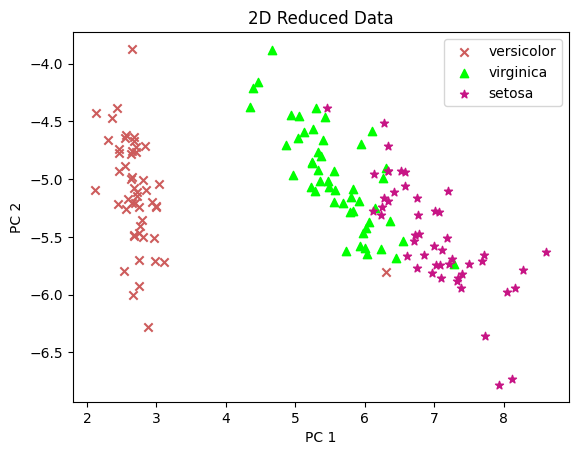

In [ ]:
x=[]
y=[]
for i in d2_data:
  x.append(i[0])
  y.append(i[1])
plt.scatter(x[:51],y[:51],color='indianred',marker='x')
plt.scatter(x[51:101],y[51:101],color='lime',marker='^')
plt.scatter(x[101:],y[101:],color='mediumvioletred',marker='*')
plt.legend(species)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('2D Reduced Data')
plt.show()

For 3D Data

Text(0.5, 0.92, '3D Reduced Data')

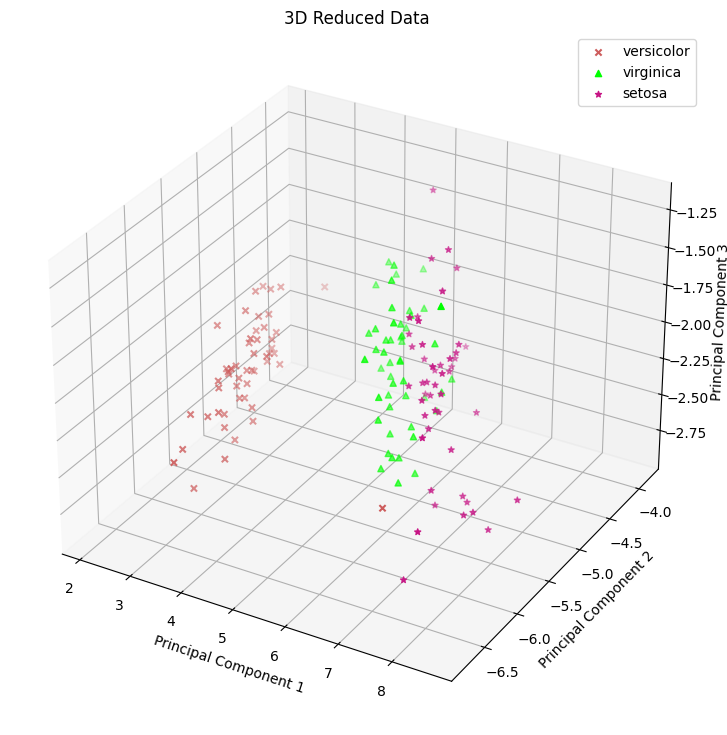

In [ ]:
x=[]
y=[]
z=[]
fig = plt.figure(figsize=(9,9))
ax=fig.add_subplot(111,projection='3d')
for i in d3_data:
  x.append(i[0])
  y.append(i[1])
  z.append(i[2])
ax.scatter(x[:51],y[:51],z[:51],color='indianred',marker='x')
ax.scatter(x[51:101],y[51:101],z[51:101],color='lime',marker='^')
ax.scatter(x[101:],y[101:],z[101:],color='mediumvioletred',marker='*')
ax.legend(species)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Reduced Data')